In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv('ctv500data.csv')
df.head()

,text,label
0,Jadi mengenang....dulu pertama kali naik pesaw...,2
1,Bang jika hanya nunjukin ktp bisa gak? Di kont...,1
2,Makasih dek ya untuk mengalaminya untu naik pe...,2
3,Biasanya gue naik pesawat ngekor. Ortu kemana ...,0
4,Pertama kali naik pesawat dari pnk menuju Jaka...,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    527 non-null    object
 1   label   527 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


In [5]:
print('Total Jumlah Komentar : ',df.shape[0],'data\n')
print('Terdiri dari (label) : ')
print('-- [0] Sentimen Negatif\t : ',df[df.label==0].shape[0],'data')
print('-- [1] Sentimen Netral\t : ',df[df.label==1].shape[0],'data')
print('-- [2] Sentimen Positif\t : ',df[df.label==2].shape[0],'data')

Total Jumlah Komentar :  527 data

Terdiri dari (label) : 
-- [0] Sentimen Negatif	 :  108 data
-- [1] Sentimen Netral	 :  227 data
-- [2] Sentimen Positif	 :  192 data


<function matplotlib.pyplot.show(close=None, block=None)>

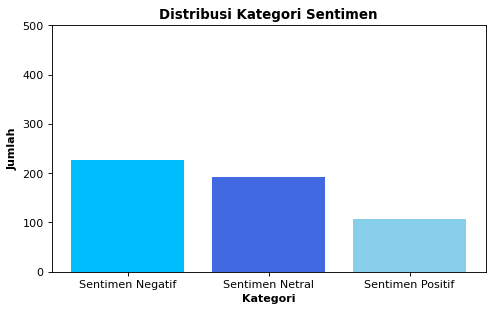

In [6]:
height=df['label'].value_counts()
labels=('Sentimen Negatif','Sentimen Netral','Sentimen Positif')
y_pos=np.arange(len(labels))

plt.figure(figsize=(7,4),dpi=80)
plt.ylim(0,500)
plt.title('Distribusi Kategori Sentimen',fontweight='bold')
plt.xlabel('Kategori',fontweight='bold')
plt.ylabel('Jumlah',fontweight='bold')
plt.bar(y_pos,height,color=['deepskyblue','royalblue','skyblue'])
plt.xticks(y_pos,labels)
plt.show

## Text Preprocessing

### Case Folding

In [7]:
import re
def casefolding(text):
    text=text.lower()
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    text=re.sub(r'[-+]?[0-9]+','',text)
    text=re.sub(r'[^\w\s]','',text)
    text=text.strip()
    return text

In [8]:
raw_sample=df['text'].iloc[141]
case_folded=casefolding(raw_sample)

print('Raw Data\t : ',raw_sample)
print('Case Folded\t : ',case_folded)

Raw Data	 :  <a href="https://www.youtube.com/watch?v=9j4Td1SfI7U&amp;t=14m45s">14:45</a> sumpah gw gak salah liat??? Ada jet tempur sukhoi ?👀 pengen banget liat langsung jet tempur🥺
Case Folded	 :  a href sumpah gw gak salah liat ada jet tempur sukhoi  pengen banget liat langsung jet tempur


### Word Normalization

In [9]:
key_norm=pd.read_csv('key_norm.csv')

def text_normalize(text):
    text=' '.join([key_norm[key_norm['singkat']==word]['hasil'].values[0] if(key_norm['singkat']==word).any() else word for word in text.split()])
    text=str.lower(text)
    return text

### Filtering (Stopword Removal)

In [10]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords

stopwords_ind=stopwords.words('indonesian')

In [11]:
len(stopwords_ind)

758

In [12]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [13]:
more_stopword=['href','a','b','br']
stopwords_ind=stopwords_ind+more_stopword

def remove_stop_words(text):
    clean_words=[]
    text=text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [14]:
raw_sample=df['text'].iloc[141]
case_folded=casefolding(raw_sample)
stopword_removal=remove_stop_words(case_folded)

print('Raw Data\t: ',raw_sample)
print('Case Folded\t: ',case_folded)
print('Stopword Removal\t: ',stopword_removal)

Raw Data	:  <a href="https://www.youtube.com/watch?v=9j4Td1SfI7U&amp;t=14m45s">14:45</a> sumpah gw gak salah liat??? Ada jet tempur sukhoi ?👀 pengen banget liat langsung jet tempur🥺
Case Folded	:  a href sumpah gw gak salah liat ada jet tempur sukhoi  pengen banget liat langsung jet tempur
Stopword Removal	:  sumpah gw gak salah liat jet tempur sukhoi pengen banget liat langsung jet tempur


### Stemming

In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory=StemmerFactory()
stemmer=factory.create_stemmer()

def stemming(text):
    text=stemmer.stem(text)
    return text

In [16]:
raw_sample=df['text'].iloc[141]
case_folded=casefolding(raw_sample)
stopword_removal=remove_stop_words(case_folded)
text_stemming=stemming(stopword_removal)

print('Raw Data\t: ',raw_sample)
print('Case Folded\t: ',case_folded)
print('Stopword Removal\t: ',stopword_removal)
print('Stemming\t\t: ',text_stemming)

Raw Data	:  <a href="https://www.youtube.com/watch?v=9j4Td1SfI7U&amp;t=14m45s">14:45</a> sumpah gw gak salah liat??? Ada jet tempur sukhoi ?👀 pengen banget liat langsung jet tempur🥺
Case Folded	:  a href sumpah gw gak salah liat ada jet tempur sukhoi  pengen banget liat langsung jet tempur
Stopword Removal	:  sumpah gw gak salah liat jet tempur sukhoi pengen banget liat langsung jet tempur
Stemming		:  sumpah gw gak salah liat jet tempur sukhoi ken banget liat langsung jet tempur


### Text Preprocessing Pipeline

In [17]:
def text_preprocessing_process(text):
    text=casefolding(text)
    text=text_normalize(text)
    text=remove_stop_words(text)
    text=stemming(text)
    return text

In [18]:
%%time
df['clean_text']=df['text'].apply(text_preprocessing_process)

CPU times: total: 2min 19s
Wall time: 2min 51s


In [19]:
df

,text,label,clean_text
0,Jadi mengenang....dulu pertama kali naik pesaw...,2,mengenangdulu kali pesawat beasiswa kuliah ing...
1,Bang jika hanya nunjukin ktp bisa gak? Di kont...,1,bang nunjukin ktp konter nunjukin bukti tiket ...
2,Makasih dek ya untuk mengalaminya untu naik pe...,2,terimakasih dek ya alam untu pesawat
3,Biasanya gue naik pesawat ngekor. Ortu kemana ...,0,pesawat ngekor ortu mana kesana sekolah mana n...
4,Pertama kali naik pesawat dari pnk menuju Jaka...,2,kali pesawat pnk jakarta tegang bangetinsya al...
...,...,...,...
522,Kak mau nanya semisal baru pertama kali naik p...,1,kak kali pesawat ktp kartu ajar kak
523,Bang aku mau tanya Kalau Misal Belum punya KTP...,1,bang ktp pakai kartu ajar
524,Di ruang tunggu citilink apakah ada musholla?,1,ruang tunggu citilink musholla
525,Ngeri2 gmna gtu waktu naik pesawat SQ ke SG pe...,0,ngeri pesawat sq sg x untung sq


In [21]:
df.to_csv('clean_data.csv')

### Feature Engineering

In [22]:
x=df['clean_text']
y=df['label']

In [23]:
x

0      mengenangdulu kali pesawat beasiswa kuliah ing...
1      bang nunjukin ktp konter nunjukin bukti tiket ...
2                   terimakasih dek ya alam untu pesawat
3      pesawat ngekor ortu mana kesana sekolah mana n...
4      kali pesawat pnk jakarta tegang bangetinsya al...
                             ...                        
522                  kak kali pesawat ktp kartu ajar kak
523                            bang ktp pakai kartu ajar
524                       ruang tunggu citilink musholla
525                      ngeri pesawat sq sg x untung sq
526                                 tutorial negeri donk
Name: clean_text, Length: 527, dtype: object

In [24]:
y

0      2
1      1
2      2
3      0
4      2
      ..
522    1
523    1
524    1
525    0
526    1
Name: label, Length: 527, dtype: int64

### Feature Extraction (TF-IDF & N-Gram)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec_TF_IDF=TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)
x_tf_idf=vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_,open('feature_tf_idf.pkl','wb'))

In [26]:
vec_TF_IDF.vocabulary_

{'mengenangdulu': 827,
 'kali': 612,
 'pesawat': 1035,
 'beasiswa': 152,
 'kuliah': 717,
 'inggris': 516,
 'newcastle': 895,
 'deg': 323,
 'degan': 324,
 'plus': 1058,
 'transit': 1372,
 'pulak': 1088,
 'dubaidatang': 368,
 'soetta': 1245,
 'salatiga': 1145,
 'kereta': 662,
 'api': 67,
 'turun': 1399,
 'gambir': 415,
 'degdegannya': 325,
 'ampunnaik': 54,
 'damri': 313,
 'terminal': 1333,
 'dcek': 322,
 'in': 508,
 'paspor': 1001,
 'kosong': 702,
 'kecuali': 637,
 'student': 1255,
 'uk': 1408,
 'nempelditanyain': 892,
 'tiket': 1350,
 'pulang': 1089,
 'nya': 943,
 'gelagap': 428,
 'hahha': 451,
 'lupa': 772,
 'studi': 1256,
 'balikhabis': 106,
 'cek': 271,
 'jalan': 544,
 'imigrasiyang': 507,
 'antri': 61,
 'ampunditanya': 53,
 'tugas': 1388,
 'imigrasi': 506,
 'percaya': 1018,
 'mahasiswa': 785,
 'pakai': 980,
 'lusuh': 775,
 'daerah': 307,
 'ibukota': 491,
 'habis': 445,
 'lumayan': 770,
 'lega': 746,
 'perasaannyasambil': 1016,
 'tunggu': 1395,
 'boarding': 209,
 'emirates': 382,
 '

In [27]:
print(len(vec_TF_IDF.get_feature_names()))

1477


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
print(vec_TF_IDF.get_feature_names())

['aaamiiin', 'aamiin', 'aamiinnn', 'abang', 'abanggg', 'abg', 'acar', 'acara', 'adik', 'aduk', 'adukdari', 'advise', 'ahahahhaha', 'ahh', 'air', 'airairasia', 'airasia', 'airbrarti', 'airbrpas', 'airbus', 'airlines', 'airlinesbr', 'airplane', 'airport', 'airportmedan', 'aisle', 'aisyah', 'ajaaahhhhh', 'ajaajagmna', 'ajak', 'ajar', 'ajdi', 'akau', 'aksesorisnya', 'aktf', 'aktif', 'akutuu', 'ala', 'alam', 'alat', 'alhamdulillah', 'alias', 'allah', 'allhamdulillah', 'alon', 'alumni', 'aman', 'ambil', 'ambon', 'amerika', 'amin', 'aminn', 'amp', 'ampunditanya', 'ampunnaik', 'an', 'anak', 'and', 'angkotnaik', 'anjay', 'antigen', 'antri', 'ap', 'apa', 'apadkkasi', 'apain', 'apakh', 'api', 'apinaik', 'apkh', 'arah', 'arahin', 'arahintapi', 'aroma', 'asa', 'asap', 'asepso', 'asia', 'asiabrbrbrsemangat', 'asisten', 'asli', 'assalammualaikum', 'assalamualaikum', 'astaga', 'atas', 'ato', 'atr', 'atur', 'au', 'auto', 'awak', 'awan', 'bab', 'baca', 'backpack', 'bacot', 'bagasi', 'bagi', 'bagsi', 'ba

In [29]:
x1=vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf=pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

,aaamiiin,aamiin,aamiinnn,abang,abanggg,abg,acar,acara,adik,aduk,...,ye,ygy,yh,yogyabali,youtub,youtube,youtubers,ytb,yutchup,zuuhhh
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
data_tabular_tf_idf.iloc[10:20,60:70]

,antigen,antri,ap,apa,apadkkasi,apain,apakh,api,apinaik,apkh
10,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
11,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
12,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
13,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.427229,0.0,0.0
14,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
15,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
16,0.0,0.0,0.0,0.294617,0.0,0.0,0.0,0.000000,0.0,0.0
17,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
18,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
19,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


### Feature Selection

In [31]:
x_train=np.array(data_tabular_tf_idf)
y_train=np.array(y)

In [32]:
from sklearn.feature_selection import SelectKBest,chi2

chi2_features=SelectKBest(chi2,k=1400)
x_kbest_features=chi2_features.fit_transform(x_train,y_train)

print('Original feature number : ',x_train.shape[1])
print('Reduced feature number : ',x_kbest_features.shape[1])

Original feature number :  1477
Reduced feature number :  1400


In [33]:
data=pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
data

,Nilai
0,0.597891
1,0.203315
2,0.496539
3,0.761376
4,0.632360
...,...
1472,1.335719
1473,0.587636
1474,0.374400
1475,0.304909


In [34]:
feature=vec_TF_IDF.get_feature_names()
feature
data['Fitur']=feature
data

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,0.597891,aaamiiin
1,0.203315,aamiin
2,0.496539,aamiinnn
3,0.761376,abang
4,0.632360,abanggg
...,...,...
1472,1.335719,youtube
1473,0.587636,youtubers
1474,0.374400,ytb
1475,0.304909,yutchup


In [35]:
data.sort_values(by='Nilai',ascending=False)

,Nilai,Fitur
1293,37.117553,takut
1328,22.440131,terimakasih
706,16.706276,ktp
807,12.069940,mantap
805,11.925004,manfaat
...,...,...
316,0.032533,dapet
142,0.024560,batik
1399,0.017136,turun
424,0.015501,gate


In [36]:
mask=chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [37]:
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['aaamiiin',
 'aamiin',
 'aamiinnn',
 'abang',
 'abanggg',
 'abg',
 'acar',
 'acara',
 'adik',
 'aduk',
 'adukdari',
 'advise',
 'ahahahhaha',
 'ahh',
 'air',
 'airasia',
 'airbrarti',
 'airbrpas',
 'airbus',
 'airlines',
 'airlinesbr',
 'airplane',
 'airport',
 'airportmedan',
 'aisyah',
 'ajaaahhhhh',
 'ajaajagmna',
 'ajak',
 'ajar',
 'ajdi',
 'akau',
 'aktf',
 'aktif',
 'akutuu',
 'ala',
 'alam',
 'alat',
 'alhamdulillah',
 'alias',
 'allah',
 'allhamdulillah',
 'alon',
 'alumni',
 'ambil',
 'ambon',
 'amerika',
 'amin',
 'aminn',
 'an',
 'anak',
 'and',
 'angkotnaik',
 'anjay',
 'antigen',
 'antri',
 'ap',
 'apa',
 'apadkkasi',
 'apain',
 'apakh',
 'api',
 'apinaik',
 'apkh',
 'arah',
 'arahin',
 'arahintapi',
 'aroma',
 'asa',
 'asap',
 'asepso',
 'asia',
 'asiabrbrbrsemangat',
 'asisten',
 'asli',
 'assalammualaikum',
 'assalamualaikum',
 'astaga',
 'atas',
 'ato',
 'atr',
 'atur',
 'au',
 'auto',
 'awak',
 'awan',
 'bab',
 'baca',
 'backpack',
 'bacot',
 'bagasi',
 'bagi',
 'bag

In [38]:
new_selected_feature={}

for(k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v
new_selected_feature

{'kali': 612,
 'pesawat': 1035,
 'beasiswa': 152,
 'kuliah': 717,
 'inggris': 516,
 'newcastle': 895,
 'deg': 323,
 'degan': 324,
 'plus': 1058,
 'transit': 1372,
 'soetta': 1245,
 'salatiga': 1145,
 'kereta': 662,
 'api': 67,
 'terminal': 1333,
 'in': 508,
 'paspor': 1001,
 'kecuali': 637,
 'student': 1255,
 'uk': 1408,
 'tiket': 1350,
 'nya': 943,
 'lupa': 772,
 'studi': 1256,
 'cek': 271,
 'jalan': 544,
 'antri': 61,
 'tugas': 1388,
 'imigrasi': 506,
 'percaya': 1018,
 'mahasiswa': 785,
 'pakai': 980,
 'lumayan': 770,
 'tunggu': 1395,
 'boarding': 209,
 'jadwal': 540,
 'sakit': 1141,
 'mulu': 869,
 'saking': 1140,
 'tegangnyahahah': 1315,
 'untung': 1417,
 'tegang': 1314,
 'wc': 1440,
 'pas': 999,
 'wkwkkw': 1449,
 'quotdiusirquot': 1096,
 'pramugari': 1074,
 'suruh': 1279,
 'transfer': 1371,
 'alat': 39,
 'lapor': 739,
 'bingung': 197,
 'orang': 969,
 'jemput': 572,
 'alam': 38,
 'sungguh': 1274,
 'sekalisekarang': 1176,
 'kerja': 667,
 'singapore': 1223,
 'jawa': 557,
 'silk': 121

In [39]:
len(new_selected_feature)

1400

In [40]:
pickle.dump(new_selected_feature,open('selected_feature_tf_idf.pkl','wb'))

In [41]:
data_selected_feature=pd.DataFrame(x_kbest_features,columns=selected_feature)
data_selected_feature

,aaamiiin,aamiin,aamiinnn,abang,abanggg,abg,acar,acara,adik,aduk,...,ye,ygy,yh,yogyabali,youtub,youtube,youtubers,ytb,yutchup,zuuhhh
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
data_selected_feature.iloc[10:20,60:70]

,api,apinaik,apkh,arah,arahin,arahintapi,aroma,asa,asap,asepso
10,0.000000,0.0,0.0,0.304577,0.0,0.0,0.0,0.0,0.0,0.0
11,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
12,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
13,0.427229,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
15,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
16,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
17,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
18,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
19,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
selected_x=x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Modelling (Machine Learning)

In [44]:
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [45]:
x=selected_x
y=df.label

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
print('Banyak data x_train : ',len(x_train))
print('Banyak data x_test : ',len(x_test))
print('Banyak data y_train : ',len(y_train))
print('Banyak data y_test : ',len(y_test))

Banyak data x_train :  421
Banyak data x_test :  106
Banyak data y_train :  421
Banyak data y_test :  106


In [47]:
from datetime import datetime
start_time=datetime.now()

text_algorithm=MultinomialNB()
model=text_algorithm.fit(x_train,y_train)

filename='ctv_sentiment.sav'
pickle.dump(model,open(filename,'wb'))

end_time=datetime.now()
result_time=end_time-start_time
print("Duration : ",result_time)

Duration :  0:00:00.005998


In [48]:
predicted=model.predict(x_test)
predicted

array([2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1], dtype=int64)

### Model Evaluation

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

newprediksibenar=(predicted==y_test).sum()
newprediksisalah=(predicted!=y_test).sum()

print('Prediksi benar : ',newprediksibenar,' data')
print('Prediksi salah : ',newprediksisalah,' data')
print('Akurasi algoritma : ',newprediksibenar/(newprediksibenar+newprediksisalah)*100,'%')

cm=confusion_matrix(y_test,predicted)

TN=cm[0][0]
FN=cm[1][0]
TP=cm[1][1]
FP=cm[0][1]
precision=TP/(TP+FP)
recall=TP/(TP+FN)

print('TRUE NEGATIVE (TN) : ',TN)
print('FALSE NEGATIVE (FN) : ',FN)
print('TRUE POSITIVE (TP) : ',TP)
print('FALSE POSITIVE (FP) : ',FP)
print('PRECISION : ',precision*100,'%')
print('RECALL : ',recall*100,'%')

print(classification_report(y_test,predicted))

Prediksi benar :  79  data
Prediksi salah :  27  data
Akurasi algoritma :  74.52830188679245 %
TRUE NEGATIVE (TN) :  9
FALSE NEGATIVE (FN) :  1
TRUE POSITIVE (TP) :  39
FALSE POSITIVE (FP) :  11
PRECISION :  78.0 %
RECALL :  97.5 %
              precision    recall  f1-score   support

           0       0.90      0.43      0.58        21
           1       0.68      0.83      0.75        47
           2       0.79      0.82      0.81        38

    accuracy                           0.75       106
   macro avg       0.79      0.69      0.71       106
weighted avg       0.77      0.75      0.74       106



In [103]:
import cv2
from wordcloud import WordCloud

In [151]:
df2=pd.read_csv('clean_data.csv')

In [152]:
originalimage=cv2.imread('cloud.jpg')
grayimage=cv2.cvtColor(originalimage,cv2.COLOR_BGR2GRAY)
(tresh,cloud_mask)=cv2.threshold(grayimage,100,255,cv2.THRESH_BINARY)

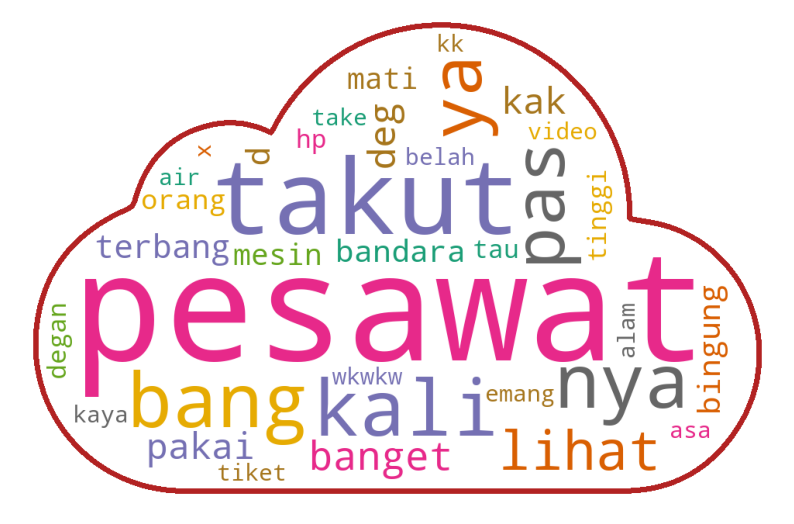

In [153]:
sentimen_negatif=df2[df2.label==0]
negatif_string=[]

for t in sentimen_negatif.clean_text:
    negatif_string.append(t)

negatif_string=pd.Series(negatif_string).str.cat(sep=' ')

wordcloud=WordCloud(width=1600,height=500,margin=10,
                    background_color='white',colormap='Dark2',
                    max_font_size=200,min_font_size=25,mask=cloud_mask,
                    contour_width=10,contour_color='firebrick',
                    max_words=100).generate(negatif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

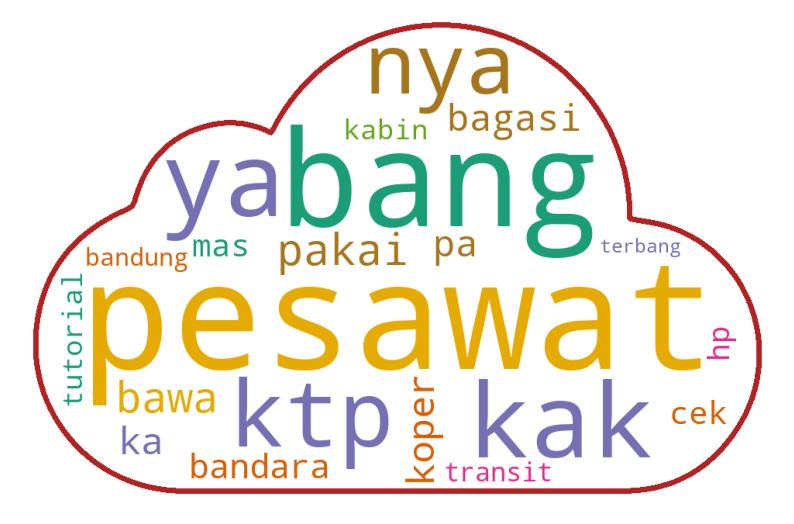

In [154]:
sentimen_netral=df2[df2.label==1]
netral_string=[]

for t in sentimen_netral.clean_text:
    netral_string.append(t)

netral_string=pd.Series(netral_string).str.cat(sep=' ')

wordcloud=WordCloud(width=1600,height=500,margin=10,
                    background_color='white',colormap='Dark2',
                    max_font_size=200,min_font_size=25,mask=cloud_mask,
                    contour_width=10,contour_color='firebrick',
                    max_words=100).generate(netral_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

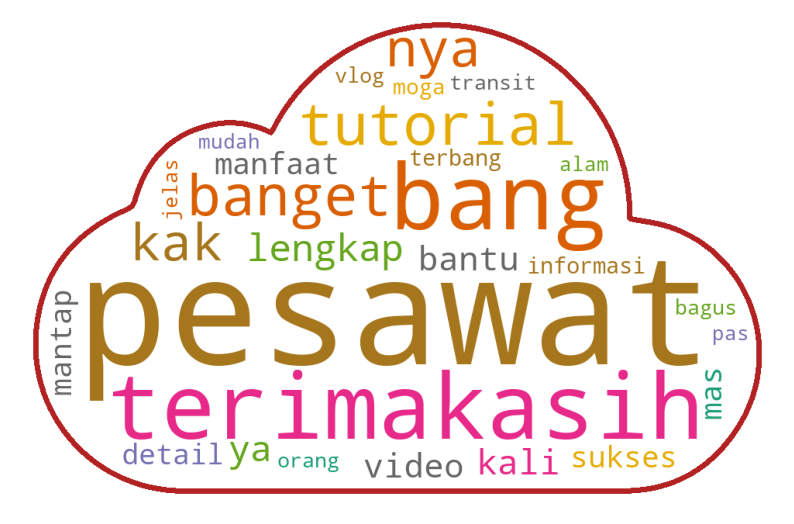

In [155]:
sentimen_positif=df2[df2.label==2]
positif_string=[]

for t in sentimen_positif.clean_text:
    positif_string.append(t)

positif_string=pd.Series(positif_string).str.cat(sep=' ')

wordcloud=WordCloud(width=1600,height=500,margin=10,
                    background_color='white',colormap='Dark2',
                    max_font_size=200,min_font_size=25,mask=cloud_mask,
                    contour_width=10,contour_color='firebrick',
                    max_words=100).generate(positif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [157]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
words_count_matrix=cv.fit_transform(df2['text'])
count_vect=pd.DataFrame.sparse.from_spmatrix(words_count_matrix,columns=cv.get_feature_names())

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


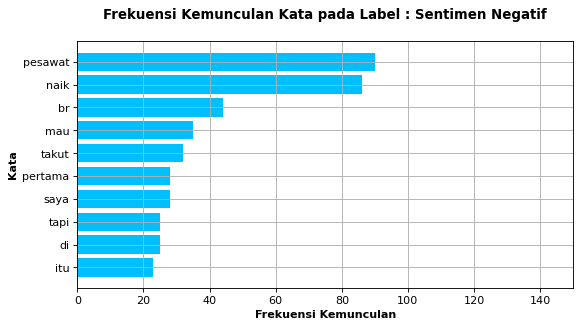

In [158]:
#Sentimen Negatif

negatif_words=count_vect[df2.label==0]
negatif_words_count=negatif_words.sum()
indices=np.argsort(negatif_words_count)[::-1][:10]
negatif_words_count=negatif_words_count[indices]

plt.figure(figsize=(8,4),dpi=80)
plt.barh(np.arange(len(negatif_words_count)),
         negatif_words_count.values,
         color='deepskyblue')
plt.yticks(np.arange(len(negatif_words_count)),negatif_words_count.keys())
plt.gca().invert_yaxis()
plt.xlim(0,150)
plt.title('Frekuensi Kemunculan Kata pada Label : Sentimen Negatif\n',fontweight='bold')
plt.xlabel('Frekuensi Kemunculan',fontweight='bold')
plt.ylabel('Kata',fontweight='bold')
plt.grid()

plt.savefig('img/frekuensi_kata_negatif.png')

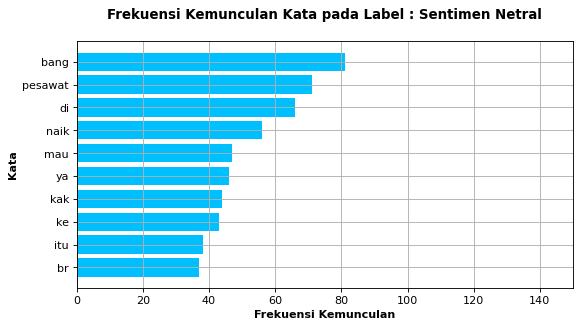

In [159]:
#Sentimen Netral

netral_words=count_vect[df2.label==1]
netral_words_count=netral_words.sum()
indices=np.argsort(netral_words_count)[::-1][:10]
netral_words_count=netral_words_count[indices]

plt.figure(figsize=(8,4),dpi=80)
plt.barh(np.arange(len(netral_words_count)),
         netral_words_count.values,
         color='deepskyblue')
plt.yticks(np.arange(len(netral_words_count)),netral_words_count.keys())
plt.gca().invert_yaxis()
plt.xlim(0,150)
plt.title('Frekuensi Kemunculan Kata pada Label : Sentimen Netral\n',fontweight='bold')
plt.xlabel('Frekuensi Kemunculan',fontweight='bold')
plt.ylabel('Kata',fontweight='bold')
plt.grid()

plt.savefig('img/frekuensi_kata_netral.png')

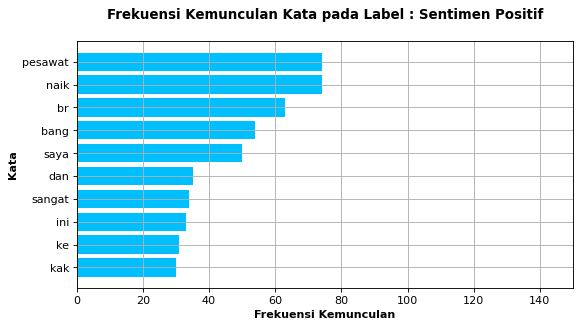

In [160]:
#Sentimen Positif

positif_words=count_vect[df2.label==2]
positif_words_count=positif_words.sum()
indices=np.argsort(positif_words_count)[::-1][:10]
positif_words_count=positif_words_count[indices]

plt.figure(figsize=(8,4),dpi=80)
plt.barh(np.arange(len(positif_words_count)),
         positif_words_count.values,
         color='deepskyblue')
plt.yticks(np.arange(len(positif_words_count)),positif_words_count.keys())
plt.gca().invert_yaxis()
plt.xlim(0,150)
plt.title('Frekuensi Kemunculan Kata pada Label : Sentimen Positif\n',fontweight='bold')
plt.xlabel('Frekuensi Kemunculan',fontweight='bold')
plt.ylabel('Kata',fontweight='bold')
plt.grid()

plt.savefig('img/frekuensi_kata_positif.png')